## <font color='blue'>Decomposição em Valores Singulares (SVD)</font>

### Material produzido por Luis Gustavo Nonato
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**

## Conteúdo
- Decomposição SVD
  - Dedução matemática
  - Interpretação de transformações lineares via SVD
  - Aproximação de posto reduzido  
  - SVD x PCA

---

# <font color='blue'>SVD - Dedução Matemática</font>
Suponha $\mathbf{A}$ uma matriz $m \times n$. A matriz $\mathbf{A}^\top \mathbf{A}$ é uma matriz $n \times n$ simétrica semi-definida positiva. 

---
**Prova das Propriedades**:
$$
(\mathbf{A}^\top \mathbf{A})^\top = \mathbf{A}^\top \mathbf{A} \mbox{ (simetria)}
$$

$$
\mathbf{x}^\top \mathbf{A}^\top \mathbf{A} \mathbf{x} = (\mathbf{A}\mathbf{x})^\top \mathbf{A} \mathbf{x} = \|\mathbf{A}x\|^2\geq 0 \mbox{ (semi-definida positiva)}
$$

---

Desta forma, temos que:

$$
\mathbf{A}^\top \mathbf{A} = \mathbf{V}\mathbf{\Lambda} \mathbf{V}^\top \quad \mbox{(teorema espectral)}
$$

onde as colunas de $\mathbf{V}$ são os autovetores ortogonais de $\mathbf{A}^\top \mathbf{A}$ e $\Lambda$ é matriz diagonal onde os elementos diagonais são os autovalores de $\mathbf{A}^\top \mathbf{A}$, ou seja, denotando as colunas de $\mathbf{V}$ por $\mathbf{v}_i$, temos a relação:
$$\mathbf{A}^\top \mathbf{A}\mathbf{v}_i = \lambda_i\mathbf{v}_i$$

A matriz $\mathbf{A}$ transforma vetores de $\mathbb{R}^n$ em $\mathbb{R}^m$, então $\tilde{\mathbf{u}}_i=\mathbf{A}\mathbf{v}_i$ é um vetor em $\mathbb{R}^m$. 

$$
\tilde{\mathbf{u}}_j^\top \tilde{\mathbf{u}}_i = (\mathbf{A}\mathbf{v}_j)^\top(\mathbf{A}\mathbf{v}_i) = \mathbf{v}_j^\top (\mathbf{A}^\top \mathbf{A}\mathbf{v}_i) = \lambda_i\mathbf{v}_j^\top\mathbf{v}_i
$$

Desta forma, como os vetores $\mathbf{v}_i$ são ortogonais, a equação acima mostra que $\tilde{\mathbf{u}}_i=\mathbf{A}\mathbf{v}_i$ também formam uma base ortogonal. Em outras palavras, a transformação $\mathbf{A}$ mapeia o conjunto de vetores ortogonais $\mathbf{v}_1,\ldots,\mathbf{v}_n$ em no conjunto de vetores ortogonais $\tilde{\mathbf{u}}_1,\ldots,\tilde{\mathbf{u}}_n$.

Fazendo $\mathbf{u}_i = \frac{1}{\sqrt{\lambda_i}}\tilde{\mathbf{u}}_i$, tornamos o conjunto $\mathbf{u}_i$ ortonormal.

In [2]:
import numpy as np

A = np.random.uniform(-1,1,size=(20,10))

AtA = np.dot(A.T,A)

S,V = np.linalg.eigh(AtA)

i = 2
j = 5
ui = np.dot(A,V[:,i])
uj = np.dot(A,V[:,j])

print(np.dot(ui.T,uj))

-3.322862818233574e-15


Considere as matrizes:

$$
\mathbf{U}=\begin{bmatrix}
| &  & | \\
\mathbf{u}_1 & \cdots & \mathbf{u}_m\\
| &  & |
\end{bmatrix}\quad
\mathbf{\Sigma}=\begin{bmatrix}
\sqrt{\lambda_1} & 0 & \cdots & 0 \\
0 & \sqrt{\lambda_2} & & 0\\
 &  & \ddots & \\
 0 & 0 & \cdots & \sqrt{\lambda_k}\\
\end{bmatrix}\quad
\mathbf{V}=\begin{bmatrix}
| &  & | \\
\mathbf{v}_1 & \cdots & \mathbf{v}_n\\
| &  & | 
\end{bmatrix}
$$

Temos a seguinte relação:

$$
\mathbf{U}{\Sigma} = \mathbf{A}\mathbf{V}\\
\Downarrow
$$
<font color='blue'>
$$
\boxed{A = \mathbf{U}{\Sigma}\mathbf{V}^\top}\\
\mbox{Decomposição SVD}
$$
</font>

Por construção, a **decomposição SVD é única**.

Note que 
$$
\mathbf{A}\mathbf{A}^\top=(\mathbf{U}{\Sigma}\mathbf{V}^\top)(\mathbf{U}{\Sigma}\mathbf{V}^\top)^\top=\mathbf{U}\Sigma\mathbf{V}^\top\mathbf{V}\Sigma\mathbf{U}^\top = \mathbf{U}\Lambda\mathbf{U}^\top
$$

ou seja, $\mathbf{U}$ é a matriz cujas colunas são os autovetores de $\mathbf{A}\mathbf{A}^\top$. Além disso, $\mathbf{A}\mathbf{A}^\top$ é também simétrica semi-definida positiva.

**Em resumo**: na decomposição SVD
1. As colunas de $\mathbf{V}$ são autovetores de $\mathbf{A}^\top\mathbf{A}$
2. As colunas de $\mathbf{U}$ são autovetores de $\mathbf{A}\mathbf{A}^\top$
3. $\mathbf{A}^\top\mathbf{A}$ e $\mathbf{A}\mathbf{A}^\top$ possuem os mesmos autovalores $\Lambda$, sendo $\Sigma = \Lambda^{\frac{1}{2}} $

#### A questão das dimensões
Na dedução acima negligenciamos as dimensões da matriz $\mathbf{A}$. Considerando que $\mathbf{A}$ tem posto máximo, temos três casos a considerar:
1. $m = n$ (matriz quadrada)<br>
    Neste caso a dedução acima vale exatamente como foi feita<br><br>
   
2. $m > n$  <br>
    Neste caso, o conjunto $\mathbf{u}_i=\frac{1}{\sqrt{\lambda_i}}\mathbf{A}\mathbf{v}_i$ não é suficiente para gerar $\mathbb{R}^m$.

$$
\left[
\begin{array}{ccc}
 & & \\
 & \mathbf{A} & \\ 
  & & \\
  & & \\
  & & \\
  & & 
\end{array}\right]= 
\left[\begin{array}{ccc|ccc}
 & & & | & & | \\
 & \mathbf{U} & & | & \cdots & |\\ 
 & & & | & & | \\
  & & & | & & | \\
   & & & | & & | \\
    & & & | & & | 
\end{array}\right]
\left[\begin{array}{ccc}
 & & \\
 & \mathbf{\Sigma} & \\ 
 & & \\\hline
0 & &  \\
 & \ddots &  \\
 & & 0
\end{array}\right]
\left[
\begin{array}{ccc}
 & & \\
 & \mathbf{V}^\top & \\ 
  & & 
\end{array}\right]
$$

3. $m < n$<br>
Neste caso, o número de vetores $\mathbf{v}_i$ é maior que o número de vetores $\mathbf{u}_i$ necessários para gerar $\mathbb{R}^m$.

$$
\left[
\begin{array}{ccccccc}
& & & & & &\\
& & & \mathbf{A} & & &\\ 
 & & & & &&
\end{array}\right]= 
\left[\begin{array}{ccc}
 & & \\
 & \mathbf{U} & \\ 
 & & 
\end{array}\right]
\left[\begin{array}{ccc|ccc}
 & & & 0 & &\\
 & \mathbf{\Sigma} & & & \ddots &\\ 
 & & & & & 0
\end{array}\right]
\left[
\begin{array}{ccc}
 & & \\
 & \mathbf{V}^\top & \\ 
 & & \\\hline
 - & - & -\\
 - & - & - 
\end{array}\right]
$$

In [3]:
import numpy as np

A = np.random.uniform(-1,1,size=(20,10))

AtA = np.dot(A.T,A)
AAt = np.dot(A,A.T)

print(AtA.shape)
print(AAt.shape)

(10, 10)
(20, 20)


In [7]:
S,V = np.linalg.eigh(AtA)
S_,U = np.linalg.eigh(AAt)

np.set_printoptions(precision=2)
print(S)
print(S_)

[ 1.12  1.99  2.51  3.02  4.45  6.73  7.3   8.41 12.39 14.2 ]
[-2.36e-15 -1.36e-15 -4.58e-16 -2.00e-16 -1.11e-16  2.13e-16  5.15e-16
  6.24e-16  1.15e-15  1.31e-15  1.12e+00  1.99e+00  2.51e+00  3.02e+00
  4.45e+00  6.73e+00  7.30e+00  8.41e+00  1.24e+01  1.42e+01]


### Calculando SVD com Numpy

In [8]:
import numpy as np

# m=n (matriz quadrada)
m=10
n=10
A = np.random.uniform(0,2,size=(m,n))

U,S,Vt = np.linalg.svd(A)
print(U.shape)
print(S.shape)
print(Vt.shape)

(10, 10)
(10,)
(10, 10)


In [9]:
# m > n 
m=10
n=7
A = np.random.uniform(0,2,size=(m,n))

U,S,Vt = np.linalg.svd(A)
print(U.shape)
print(S.shape)
print(Vt.shape)

(10, 10)
(7,)
(7, 7)


In [10]:
# m < n 
m=7
n=10
A = np.random.uniform(0,2,size=(m,n))

U,S,Vt = np.linalg.svd(A)
print(U.shape)
print(S.shape)
print(Vt.shape)

(7, 7)
(7,)
(10, 10)


## <font color='blue'>Interpretando Transformações Lineares via SVD</font>

Considere a matriz $\mathbf{A}$ como uma transformação linear de $\mathbb{R}^n$ para $\mathbb{R}^m$, temos que:

$$
\mathbf{y}=\mathbf{A}\mathbf{x}=(\underbrace{\mathbf{U}(\overbrace{\Sigma(\underbrace{\mathbf{V}^\top\mathbf{x}}_{\text{projeção}}}^{\text{escala}}))}_{reconstrução})
$$

- <font color='blue'>$\mathbf{V}^\top\mathbf{x}$:</font> Projeção do vetor $\mathbf{x}$ na base $\mathbf{v}_i$.

$$
\begin{bmatrix}
\mathbf{v}_1^\top\mathbf{x} \\ \vdots \\ \mathbf{v}_n^\top\mathbf{x}
\end{bmatrix}=
\begin{bmatrix}
- & \mathbf{v}_1 & - \\
 & \vdots & \\
- & \mathbf{v}_n & - 
\end{bmatrix}
\begin{bmatrix}
x_1 \\ \vdots \\ x_n
\end{bmatrix}
$$


- <font color='blue'>$\mathbf{\Sigma}\mathbf{V}^\top\mathbf{x}$:</font>
Escalonando cada coeficiente por $\sqrt{\lambda_i}$

$$
\begin{bmatrix}
\sqrt{\lambda_1}\mathbf{v}_1^\top\mathbf{x} \\ \vdots \\ \sqrt{\lambda_n}\mathbf{v}_n^\top\mathbf{x}
\end{bmatrix}=
\begin{bmatrix}
\sqrt{\lambda_1} & \cdots & 0 \\
 &  \ddots & \\
 0 &  \cdots & \sqrt{\lambda_n}\\
\end{bmatrix}
\begin{bmatrix}
\mathbf{v}_1^\top\mathbf{x} \\ \vdots \\ \mathbf{v}_n^\top\mathbf{x}
\end{bmatrix}
$$

- <font color='blue'>$\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top\mathbf{x}$:</font> $\mathbf{y}$ é combinação linear dos $\mathbf{u}_i$ com coeficientes $\sqrt{\lambda_i}\mathbf{v}_i^\top\mathbf{x}$

$$
\mathbf{y}=(\sqrt{\lambda_1}\mathbf{v}_1^\top\mathbf{x})
\begin{bmatrix}
| \\ \mathbf{u}_1 \\ |
\end{bmatrix}+\cdots+
(\sqrt{\lambda_n}\mathbf{v}_n^\top\mathbf{x})
\begin{bmatrix}
| \\ \mathbf{u}_n \\ |
\end{bmatrix}
$$

## <font color='blue'>Aproximação de Matrizes com Posto Reduzido</font>

Uma questão importante naturalmente abordada via SVD é: "Data uma matriz $\mathbf{A}$ de posto $n$, qual é a matriz $\mathbf{B}$ de posto $r < n$ que melhor aproxima $\mathbf{A}$? Matematicamente, queremos uma matriz $\mathbf{B}$ tal que:

$$
\mathbf{B} = \arg\min_{posto(\mathbf{X})=r<n}\|\mathbf{A} - \mathbf{X}\|^2
$$

$$
\|\mathbf{A} - \mathbf{X}\|^2 = \|\mathbf{U}\Sigma\mathbf{V}^\top - \mathbf{U}\mathbf{U}^\top\mathbf{X}\mathbf{V}\mathbf{V}^\top \|^2 = \\ \\
\| \mathbf{U}(\Sigma - \mathbf{U}^\top\mathbf{X}\mathbf{V})\mathbf{V}^\top\|^2=\| \Sigma - \mathbf{U}^\top\mathbf{X}\mathbf{V}\|^2 
$$

Assim, a norma $\|\mathbf{A} - \mathbf{X}\|^2$ será mínima quando $(\Sigma - \mathbf{U}^\top\mathbf{X}\mathbf{V})$ for diagonal com elementos diagonais o mais próximos de $\Sigma$ possível. Como o posto da matriz $\mathbf{X}$ é $r < n$, apenas $r$ elementos diagonais serão diferentes de zero na matriz $\mathbf{U}^\top\mathbf{X}\mathbf{V}$. Assumindo que os $\lambda_1\geq\cdots\geq\lambda_n$, temos que:

$$
\| \Sigma - \mathbf{U}^\top\mathbf{X}\mathbf{V}\|^2 = \sum_{i=1}^r (\sqrt{\lambda_i} - d_i)^2 + \sum_{i=r+1}^n \sqrt{\lambda_i}
$$

Obviamente, o mínimo é atingido quando:

$$
\sqrt{\lambda_i} - d_i=0 \rightarrow d_i = \sqrt{\lambda_i}
$$

Ou seja, o minímo de $\| \Sigma - \mathbf{U}^\top\mathbf{X}\mathbf{V}\|^2$ ocorre quando 

$$
\mathbf{B} = \mathbf{U}_r\Sigma_r\mathbf{V}_r^\top
$$

onde $\mathbf{U}_r$ e $\mathbf{V}_r$ correspondem as $r$ primeiras colunas de $\mathbf{U}$ e $\mathbf{V}$, sendo $\Sigma_r$ a matriz diagonal formada pelos elementos $\sqrt{\lambda_1}\geq\cdots\geq\sqrt{\lambda_r}$.

<font color='blue'>**Resumindo**: <br>
A matriz $\mathbf{A}_r=\mathbf{U}_r\Sigma_r\mathbf{V}_r^\top$ é a melhor aproximação de posto $r$ para a matriz $\mathbf{A}=\mathbf{U}\Sigma\mathbf{V}^\top$</font>

### Calculando Aproximação de Posto Reduzido com Python

(100, 100)


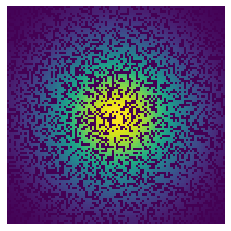

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n=100

A=np.zeros((n,n))
i = np.random.randint(0,n,n*n)
j = np.random.randint(0,n,n*n)
sigma = 1000
A[i,j] = np.exp(-((i-n/2)**2 + (j-n/2)**2)/sigma)
print(A.shape)

plt.axis('off')
plt.imshow(A)

Tomando 20 % dos autovalores


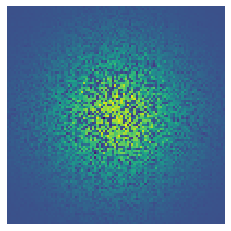

In [15]:
U,S,Vt = np.linalg.svd(A)

r = int(n*0.20)
print('Tomando',r,'% dos autovalores')

Ar = np.linalg.multi_dot([U[:,:r],np.diag(S[:r]),Vt[:r,:]])

plt.axis('off')
plt.imshow(Ar)

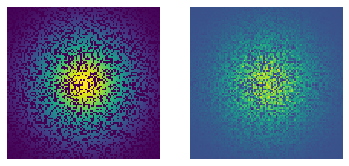

In [16]:
f, (ax1,ax2) = plt.subplots(1,2)

ax1.axis('off')
ax1.imshow(A)
ax2.axis('off')
ax2.imshow(Ar)

## <font color='blue'>SVD x PCA</font>

Suponha que as colunas de $\mathbf{A}$ correspondam à pontos em um espaço $\mathbb{R}^m$. Supondo que os dados contidos nas colunas  de $\mathbf{A}$ estejam centralizados (média de cada coordenada igual a zero), a matrix de covariância dos dados é dada por $\mathbf{A}\mathbf{A}^\top$.

As direções principais calculadas pela técnica PCA são dadas pelos autovetores da matriz de covariância $\mathbf{A}\mathbf{A}^\top$, os quais correspondem às colunas da matriz $\mathbf{U}$ na decomposição SVD, $\mathbf{A}=\mathbf{U}\Sigma\mathbf{V}^\top$. Além disso, $\mathbf{U}^\top\mathbf{A}=\Sigma\mathbf{V}^\top$, ou seja $\Sigma\mathbf{V}^\top$ correspondem a projeção dos dados nas direções principais.

<font color='blue'>**Resumindo**:<br> 
Dada a decomposição SVD de uma matriz $\mathbf{A}=\mathbf{U}\Sigma\mathbf{V}^\top$:
1. As colunas de $\mathbf{U}$ correspondem as direções principais de $A$

2. Os elementos na diagonal de $\Sigma$ correspondem ao desvio padrão dos dados em cada direção

3. $\Sigma\mathbf{V}^\top$ corresponde às coordenadas dos dados nas direções principais.</font>